# Continuous wavelet transform

In this notebook, we explore some of the benchmark signals with a different transform. Instead of the short-time Fourier transform, we'll use the continuous wavelet trasnform, or CWT. The behaviour of this transform largely depends on the 'mother' wavelet we use. In this notebook, we a Ricker wavelet, but there are a great many other choices.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Note that this notebook uses `bruges`, which you can install with:

    pip install bruges
    
The Ricker wavelet in `bruges` has the handy feature of being defined with actual frequencies, in Hertz, rather than with a width parameter, more like a Gaussian. (Alternatively, just swap it for `scipy.signal.ricker()`, as in the first example.)

In [2]:
ls signals/

airgun_800Hz.txt     landslide_100Hz.txt  seismic_250Hz.txt
bat_96000Hz.txt      ligo_4096Hz.txt      synthetic_250Hz.txt
earthquake_20Hz.txt  nuclear_20Hz.txt     tremor_100Hz.txt
ecg_500Hz.txt        piano_22050Hz.txt    upsweep_400Hz.txt
irma_1Hz.txt         seg_44100Hz.txt


## Seismic data

In [3]:
signal, _ = np.loadtxt('signals/seismic_250Hz.txt')
fs = 250

In [4]:
from scipy.signal import cwt
from scipy.signal import ricker

coeffs = cwt(signal, ricker, widths=np.arange(1,31))

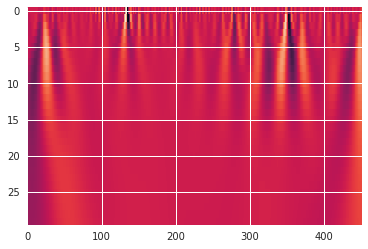

In [5]:
plt.imshow(coeffs, aspect='auto')

Now we can take a bit of time to make this plot prettier.

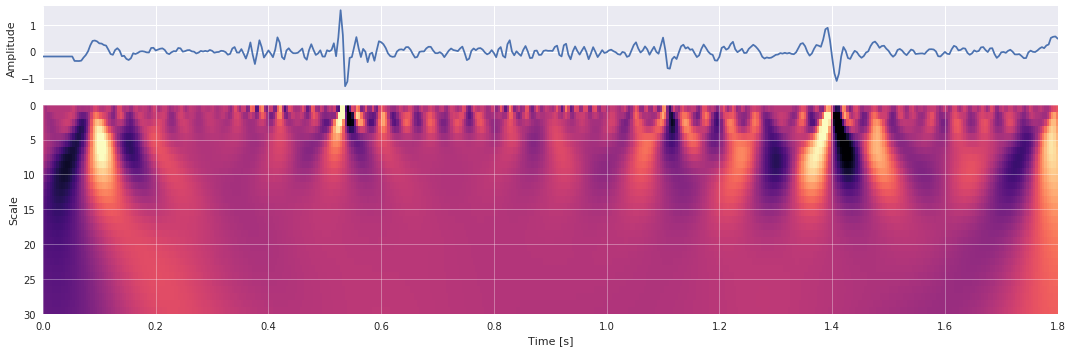

In [6]:
mx = np.percentile(coeffs, 99.8)
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})

axs[0].plot(signal/1e4)
axs[0].set_xlim(0, 450)
axs[0].set_ylabel('Amplitude')
axs[0].set_xticklabels([])
axs[1].imshow(coeffs, cmap='magma', aspect='auto', extent=[0, 450/fs, 30, 0], vmin=-mx, vmax=mx)
axs[1].set_ylabel('Scale')
axs[1].set_xlabel('Time [s]')
axs[1].grid(alpha=0.33)

plt.tight_layout()

Let's try using a more geophysical Ricker — one defined by frequency, intead of just 'width':

In [7]:
from bruges.filters import ricker as ricker_

FS = fs

def ricky(length, width):
    return ricker_(0.256, 1/FS, width)

In [25]:
mi, ma = 8, 64
widths = widths=np.arange(mi, ma+1)
coeffs = cwt(signal, ricky, widths=widths)

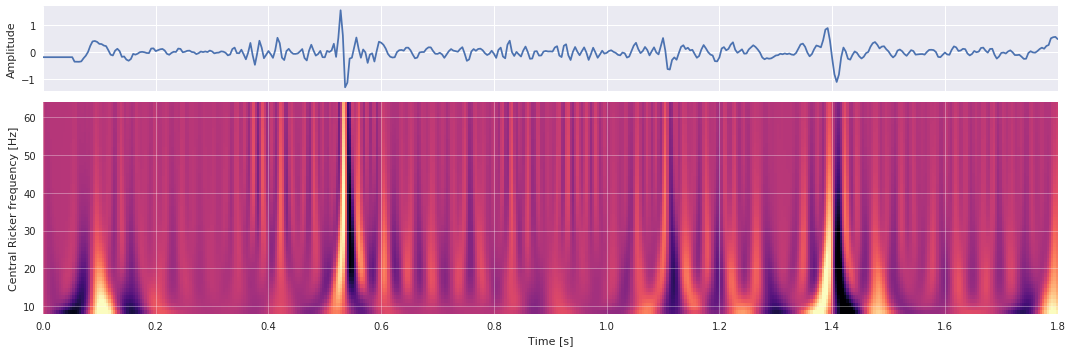

In [26]:
mx = np.percentile(coeffs, 99.8)
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})

axs[0].plot(signal/1e4)
axs[0].set_xlim(0, 450)
axs[0].set_ylabel('Amplitude')
axs[0].set_xticklabels([])
axs[1].imshow(coeffs, cmap='magma', aspect='auto', extent=[0, 450/fs, mi, ma], vmin=-mx, vmax=mx, origin='lower')
axs[1].set_ylabel('Central Ricker frequency [Hz]')
axs[1].set_xlabel('Time [s]')
axs[1].grid(alpha=0.33)

plt.tight_layout()

Or we can look at the components individually — with the central frequency of the wavelet representing that scale.

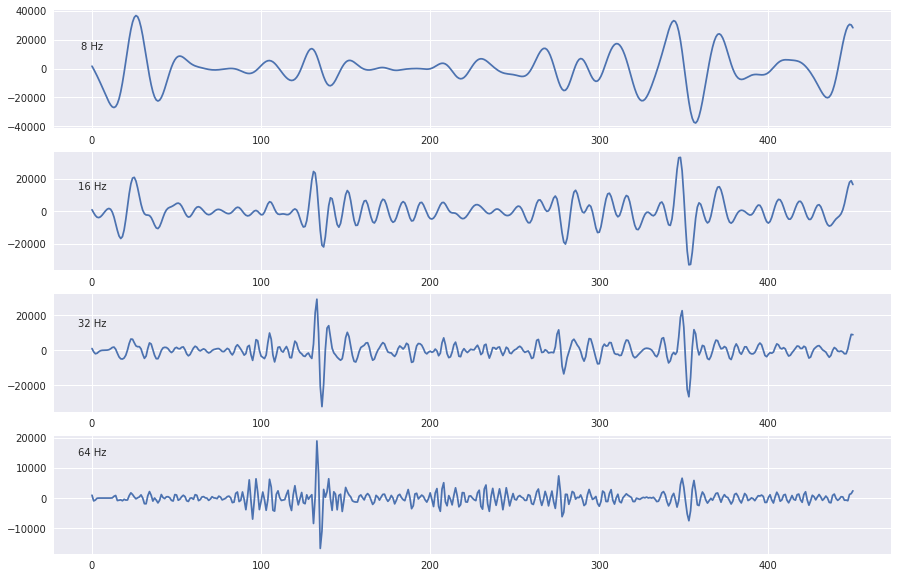

In [28]:
fig, axs = plt.subplots(figsize=(15, 10), nrows=4)
for ax, r in zip(axs, [0, 8, 24, -1]):
    ax.plot(coeffs[r])
    ax.text(0, 1.5e4, f"{widths[r]} Hz", va='center', ha='center')

## Nuclear explosion

In [29]:
signal = np.loadtxt('signals/nuclear_20Hz.txt')

In [30]:
coeffs = cwt(signal, ricker, widths=np.arange(1,101, 3))

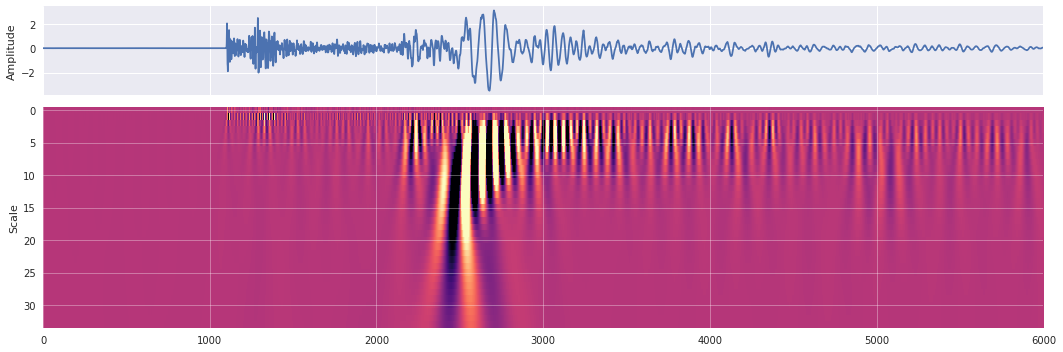

In [31]:
mx = np.percentile(coeffs, 99)
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})

axs[0].plot(signal/1e6)
axs[0].set_xlim(0, signal.size)
axs[0].set_ylabel('Amplitude')
axs[0].set_xticklabels([])
axs[1].imshow(coeffs, cmap='magma', aspect='auto', vmin=-mx, vmax=mx)
axs[1].set_ylabel('Scale')
axs[1].grid(alpha=0.33)

plt.tight_layout()

## Upsweep

In [32]:
signal = np.loadtxt('signals/upsweep_400Hz.txt')
fs = 400

In [33]:
coeffs = cwt(signal, ricker, widths=np.arange(1,2000, 50))

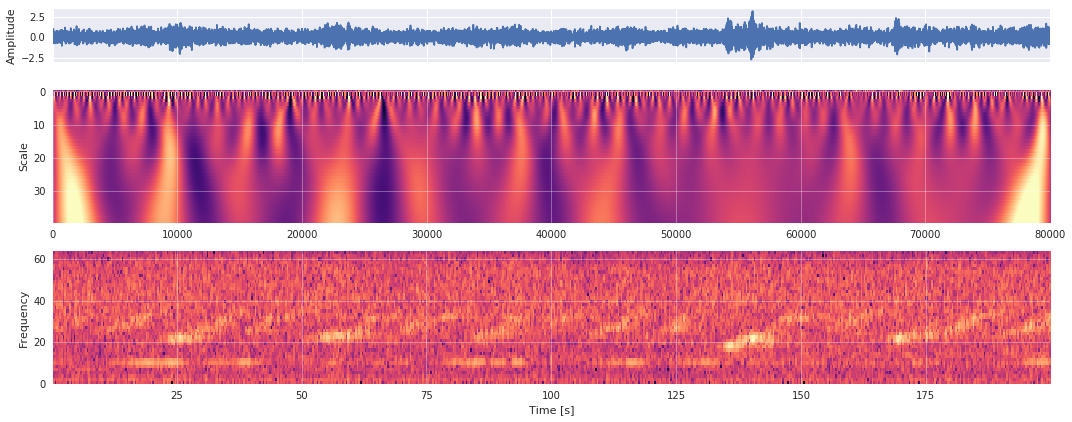

In [34]:
mx = np.percentile(coeffs, 99)
fig, axs = plt.subplots(figsize=(15, 6), nrows=3, gridspec_kw={'height_ratios':[2, 5, 5]})

axs[0].plot(signal/1e4)
axs[0].set_xlim(0, signal.size)
axs[0].set_ylabel('Amplitude')
axs[0].set_xticklabels([])

axs[1].imshow(coeffs, cmap='magma', aspect='auto', vmin=-mx, vmax=mx)
axs[1].set_ylabel('Scale')
axs[1].grid(alpha=0.33)

_ = axs[2].specgram(signal, Fs=fs, cmap='magma', aspect='auto', vmin=0)
axs[2].set_ylim(0, 64)
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('Time [s]')
axs[2].grid(alpha=0.33)

plt.tight_layout()

## Airguns

In [35]:
signal = np.loadtxt('signals/airgun_800Hz.txt')

In [36]:
coeffs = cwt(signal, ricker, widths=np.arange(1,2000, 50))

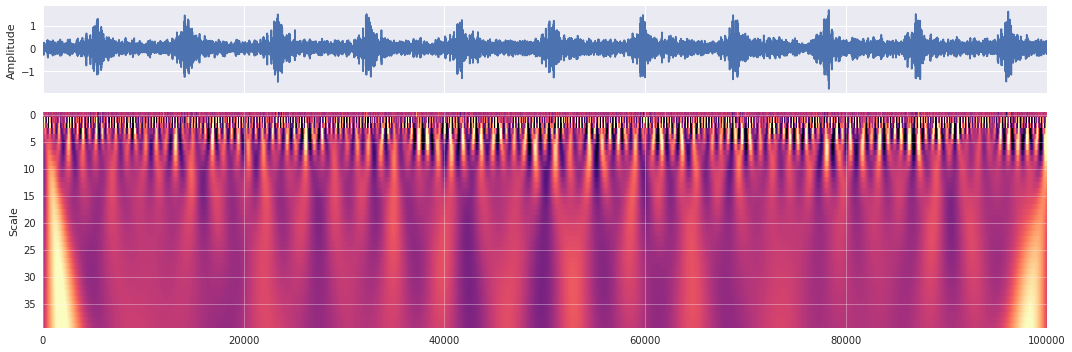

In [37]:
mx = np.percentile(coeffs, 99)
fig, axs = plt.subplots(figsize=(15, 5), nrows=2, gridspec_kw={'height_ratios':[2, 5]})

axs[0].plot(signal/1e4)
axs[0].set_xlim(0, signal.size)
axs[0].set_ylabel('Amplitude')
axs[0].set_xticklabels([])
axs[1].imshow(coeffs, cmap='magma', aspect='auto', vmin=-mx, vmax=mx)
axs[1].set_ylabel('Scale')
axs[1].grid(alpha=0.33)

plt.tight_layout()